## Load Data from CSVs

In [1]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

#with open('enrollments.csv', 'rb') as f:
 #   reader = unicodecsv.DictReader(f)
  #  enrollments = list(reader)
def read_csv(file):
    with open(file, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        file_data = list(reader)
        return file_data

    
enrollments = read_csv("C:/Users/anita/Desktop/Udacity/Nanodegree/intro_to_data_analysis/datasets/enrollments.csv")
enrollments[0]    

{'account_key': '448',
 'status': 'canceled',
 'join_date': '2014-11-10',
 'cancel_date': '2015-01-14',
 'days_to_cancel': '65',
 'is_udacity': 'True',
 'is_canceled': 'True'}

In [2]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

daily_engagement = read_csv("C:/Users/anita/Desktop/Udacity/Nanodegree/intro_to_data_analysis/datasets/daily_engagement.csv")
project_submissions = read_csv("C:/Users/anita/Desktop/Udacity/Nanodegree/intro_to_data_analysis/datasets/project_submissions.csv")
print(daily_engagement[0])
print(project_submissions[0])


{'acct': '0', 'utc_date': '2015-01-09', 'num_courses_visited': '1.0', 'total_minutes_visited': '11.6793745', 'lessons_completed': '0.0', 'projects_completed': '0.0'}
{'creation_date': '2015-01-14', 'completion_date': '2015-01-16', 'assigned_rating': 'UNGRADED', 'account_key': '256', 'lesson_key': '3176718735', 'processing_state': 'EVALUATED'}


## Fixing Data Types

In [3]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{'account_key': '448',
 'status': 'canceled',
 'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 'days_to_cancel': 65,
 'is_udacity': True,
 'is_canceled': True}

In [4]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{'acct': '0',
 'utc_date': datetime.datetime(2015, 1, 9, 0, 0),
 'num_courses_visited': 1,
 'total_minutes_visited': 11.6793745,
 'lessons_completed': 0,
 'projects_completed': 0}

In [5]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 'assigned_rating': 'UNGRADED',
 'account_key': '256',
 'lesson_key': '3176718735',
 'processing_state': 'EVALUATED'}

## Problems in the Data

In [6]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".
for engagement in daily_engagement:
    engagement['account_key'] = engagement['acct']
    del engagement['acct']    
daily_engagement[0]    

{'utc_date': datetime.datetime(2015, 1, 9, 0, 0),
 'num_courses_visited': 1,
 'total_minutes_visited': 11.6793745,
 'lessons_completed': 0,
 'projects_completed': 0,
 'account_key': '0'}

## Investigating the Data

In [7]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.
print("Total number of enrollments : ", len(enrollments))
print("Total number of daly engagements : ", len(daily_engagement))
print("Total number of project_submissions : ", len(project_submissions))

def get_unique_accounts(data):
    unique_account_keys = set()
    for data_point in data:
        unique_account_keys.add(data_point['account_key'])
    return unique_account_keys

print("Total number of unique enrollments : ", len(get_unique_accounts(enrollments)))
print("Total number of unique daily engagements : ", len(get_unique_accounts(daily_engagement)))
print("Total number of unique project_submissions : ", len(get_unique_accounts(project_submissions)))
        
        

Total number of enrollments :  1640
Total number of daly engagements :  136240
Total number of project_submissions :  3642
Total number of unique enrollments :  1302
Total number of unique daily engagements :  1237
Total number of unique project_submissions :  743


## Missing Engagement Records

In [8]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment
for enrollment in enrollments:
    if enrollment['account_key'] not in get_unique_accounts(daily_engagement):
        print(enrollment)
        break

{'account_key': '1219', 'status': 'canceled', 'join_date': datetime.datetime(2014, 11, 12, 0, 0), 'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), 'days_to_cancel': 0, 'is_udacity': False, 'is_canceled': True}


## Checking for More Problem Records

In [9]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.

# Approach 1
exceptions = 0
for enrollment in enrollments:
    if enrollment['days_to_cancel'] != 0 and enrollment['account_key'] not in get_unique_accounts(daily_engagement):
        exceptions += 1
        # print(enrollment)
        # break
print("Approach 1 : ", exceptions)

# Approach 2
exceptions = 0
for enrollment in enrollments:
    if enrollment['join_date'] != enrollment['cancel_date'] and enrollment['account_key'] not in get_unique_accounts(daily_engagement):
        exceptions += 1
        # print(enrollment)
        # break
print("Approach 2 : ", exceptions)


Approach 1 :  3
Approach 2 :  3


## Tracking Down the Remaining Problems

In [10]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [11]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [12]:
# Remove Udacity test accounts from all three tables

non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print(len(non_udacity_enrollments))
print(len(non_udacity_engagement))
print(len(non_udacity_submissions))

# adding has_visited attribute to be used later for whether a student visited classroom in a week or not
for engagement in non_udacity_engagement:
    if engagement['total_minutes_visited'] > 0:
        engagement['has_visited'] = 1
    else:
        engagement['has_visited'] = 0

1622
135656
3634


## Refining the Question

In [13]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}
for enrollment in non_udacity_enrollments:
    if not enrollment['is_canceled'] or enrollment['days_to_cancel'] > 7:
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        
        if account_key not in paid_students.keys() or enrollment_date > paid_students[account_key]:
            paid_students[account_key] = enrollment_date
len(paid_students)  

995

## Getting Data from First Week

In [14]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [15]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

paid_engagement_in_first_week = []
for engagement in non_udacity_engagement:
    if engagement['account_key'] in paid_students.keys() and \
    within_one_week(paid_students[engagement['account_key']], engagement['utc_date']):
        paid_engagement_in_first_week.append(engagement)

print("Sample paid engagement")        
print(paid_engagement_in_first_week[0])
print("Total paid engagements within one week of student's enrollment : ", len(paid_engagement_in_first_week))       


Sample paid engagement
{'utc_date': datetime.datetime(2015, 1, 9, 0, 0), 'num_courses_visited': 1, 'total_minutes_visited': 11.6793745, 'lessons_completed': 0, 'projects_completed': 0, 'account_key': '0', 'has_visited': 1}
Total paid engagements within one week of student's enrollment :  6919


## Exploring Student Engagement

In [16]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
def fetch_grouped_data(data, key):
    grouped_data = defaultdict(list)
    for data_point in data:
        data_key = data_point[key]
        grouped_data[data_key].append(data_point)
    return grouped_data    

engagement_by_account = fetch_grouped_data(paid_engagement_in_first_week, 'account_key')

In [17]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
def get_total_engagement_by_account(engagement_type, engagement_data_by_account):
    total_engagement_by_account = {}
    for account_key, engagement_for_student in engagement_data_by_account.items():
        total_engagement = 0
        for engagement_record in engagement_for_student:
            total_engagement += engagement_record[engagement_type]
        total_engagement_by_account[account_key] = total_engagement
    return total_engagement_by_account    
total_minutes_by_account = get_total_engagement_by_account('total_minutes_visited', engagement_by_account)    

Mean: 306.70832675342825
Standard deviation: 412.99693340852957
Minimum: 0.0
Maximum: 3564.7332644989997


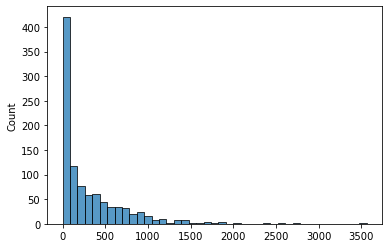

In [25]:
# %pylab inline
import numpy as np
# %matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
# Summarize the data about minutes spent in the classroom
def display_summary_stats(data):
    print('Mean:', np.mean(data))
    print('Standard deviation:', np.std(data))
    print('Minimum:', np.min(data))
    print('Maximum:', np.max(data))
    sns.histplot(data)   
    plt.show()
    
total_minutes = list(total_minutes_by_account.values())    
display_summary_stats(total_minutes)   


## Debugging Data Analysis Code

In [19]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.
for account_key in total_minutes_by_account.keys():
    if total_minutes_by_account[account_key] == np.max(total_minutes):
        print("Account with max total minutes : ", account_key)
        break;
print()
print("All engagements of the account with max total minutes")
print()
for engagement in paid_engagement_in_first_week:
    if engagement['account_key'] == account_key:
        print(engagement)

Account with max total minutes :  163

All engagements of the account with max total minutes

{'utc_date': datetime.datetime(2015, 7, 9, 0, 0), 'num_courses_visited': 4, 'total_minutes_visited': 850.519339666, 'lessons_completed': 4, 'projects_completed': 0, 'account_key': '163', 'has_visited': 1}
{'utc_date': datetime.datetime(2015, 7, 10, 0, 0), 'num_courses_visited': 6, 'total_minutes_visited': 872.633923334, 'lessons_completed': 6, 'projects_completed': 0, 'account_key': '163', 'has_visited': 1}
{'utc_date': datetime.datetime(2015, 7, 11, 0, 0), 'num_courses_visited': 2, 'total_minutes_visited': 777.018903666, 'lessons_completed': 6, 'projects_completed': 0, 'account_key': '163', 'has_visited': 1}
{'utc_date': datetime.datetime(2015, 7, 12, 0, 0), 'num_courses_visited': 1, 'total_minutes_visited': 294.568774, 'lessons_completed': 2, 'projects_completed': 0, 'account_key': '163', 'has_visited': 1}
{'utc_date': datetime.datetime(2015, 7, 13, 0, 0), 'num_courses_visited': 3, 'total_mi

## Lessons Completed in First Week

Mean: 1.636180904522613
Standard deviation: 3.002561299829423
Minimum: 0
Maximum: 36


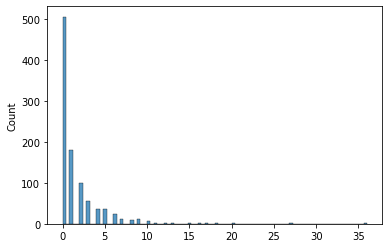

In [26]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.
total_lessons_by_account = get_total_engagement_by_account('lessons_completed', engagement_by_account)
total_lessons = list(total_lessons_by_account.values())
display_summary_stats(total_lessons)

## Number of Visits in First Week

Mean: 2.8673366834170855
Standard deviation: 2.2551980029196814
Minimum: 0
Maximum: 7


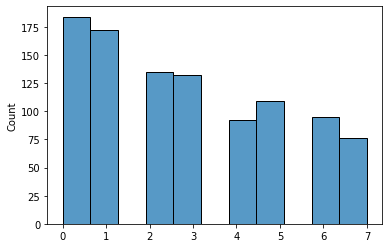

In [27]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.
total_visits_by_account = get_total_engagement_by_account('has_visited', engagement_by_account)
total_visits = list(total_visits_by_account.values())
display_summary_stats(total_visits)

## Splitting out Passing Students

In [28]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']
passed_submissions = set()

for submission in non_udacity_submissions:
    if submission['account_key'] in paid_students.keys() and\
    (submission['assigned_rating'] == 'PASSED' or submission['assigned_rating'] == 'DISTINCTION') and\
    submission['lesson_key'] in subway_project_lesson_keys:
        passed_submissions.add(submission['account_key'])

passing_engagement = []
non_passing_engagement = []

for engagement in paid_engagement_in_first_week:
    if engagement['account_key'] in passed_submissions:
        passing_engagement.append(engagement)
    else:
        non_passing_engagement.append(engagement)
    
print("Total passing engagements : ", len(passing_engagement))
print("Total non passing engagements : ", len(non_passing_engagement))

Total passing engagements :  4527
Total non passing engagements :  2392


## Comparing the Two Student Groups

summary statistics for total minutes spent by passing engagements

Mean: 394.58604648350865
Standard deviation: 448.4995193265521
Minimum: 0.0
Maximum: 3564.7332644989997


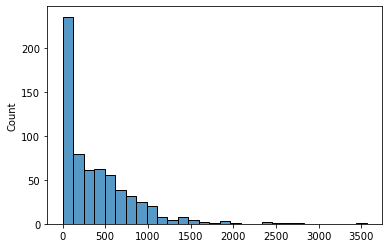


summary statistics for lessons completed by passing engagements

Mean: 2.052550231839258
Standard deviation: 3.1422270555779344
Minimum: 0
Maximum: 36


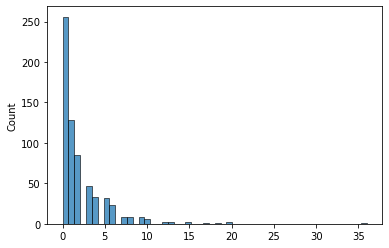


summary statistics for days_visited by passing engagements

Mean: 3.384853168469861
Standard deviation: 2.2588214709184595
Minimum: 0
Maximum: 7


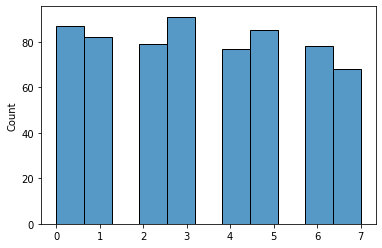


summary statistics for total minutes spent by non passing engagements

Mean: 143.32647426675584
Standard deviation: 269.5386190114951
Minimum: 0.0
Maximum: 1768.5227493319999


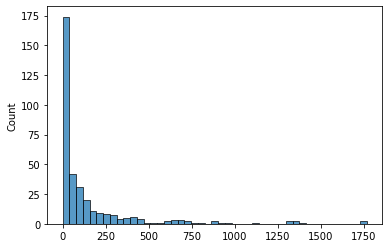


summary statistics for lessons completed by non passing engagements

Mean: 0.8620689655172413
Standard deviation: 2.5491599418312028
Minimum: 0
Maximum: 27


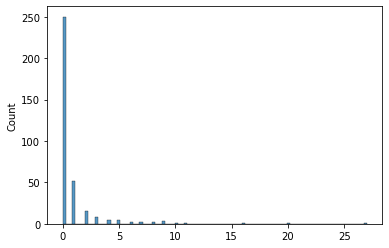


summary statistics for days_visited by non passing engagements

Mean: 1.9051724137931034
Standard deviation: 1.9057314413619046
Minimum: 0
Maximum: 7


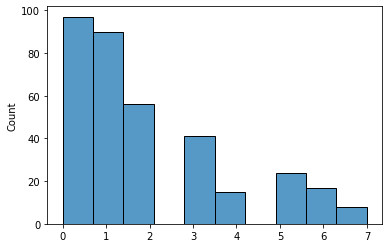

In [29]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

passing_engagement_by_account = fetch_grouped_data(passing_engagement, 'account_key')
total_minutes_spent_by_passing_engagements_by_account = get_total_engagement_by_account('total_minutes_visited', passing_engagement_by_account)
total_minutes_spent_by_passing_engagements = list(total_minutes_spent_by_passing_engagements_by_account.values())
print("summary statistics for total minutes spent by passing engagements")
print()
display_summary_stats(total_minutes_spent_by_passing_engagements)
print()

total_lessons_completed_by_passing_engagements_by_account = get_total_engagement_by_account('lessons_completed', passing_engagement_by_account)
total_lessons_completed_by_passing_engagements = list(total_lessons_completed_by_passing_engagements_by_account.values())
print("summary statistics for lessons completed by passing engagements")
print()
display_summary_stats(total_lessons_completed_by_passing_engagements)
print()

total_days_visited_by_passing_engagements_by_account = get_total_engagement_by_account('has_visited', passing_engagement_by_account)
total_days_visited_by_passing_engagements = list(total_days_visited_by_passing_engagements_by_account.values())
print("summary statistics for days_visited by passing engagements")
print()
display_summary_stats(total_days_visited_by_passing_engagements)
print()

non_passing_engagement_by_account = fetch_grouped_data(non_passing_engagement, 'account_key')
total_minutes_spent_by_non_passing_engagements_by_account = get_total_engagement_by_account('total_minutes_visited', non_passing_engagement_by_account)
total_minutes_spent_by_non_passing_engagements = list(total_minutes_spent_by_non_passing_engagements_by_account.values())
print("summary statistics for total minutes spent by non passing engagements")
print()
display_summary_stats(total_minutes_spent_by_non_passing_engagements)
print()

total_lessons_completed_by_non_passing_engagements_by_account = get_total_engagement_by_account('lessons_completed', non_passing_engagement_by_account)
total_lessons_completed_by_non_passing_engagements = list(total_lessons_completed_by_non_passing_engagements_by_account.values())
print("summary statistics for lessons completed by non passing engagements")
print()
display_summary_stats(total_lessons_completed_by_non_passing_engagements)
print()

total_days_visited_by_non_passing_engagements_by_account = get_total_engagement_by_account('has_visited', non_passing_engagement_by_account)
total_days_visited_by_non_passing_engagements = list(total_days_visited_by_non_passing_engagements_by_account.values())
print("summary statistics for days_visited by non passing engagements")
print()
display_summary_stats(total_days_visited_by_non_passing_engagements)
print()

## Making Histograms

Mean: 394.58604648350865
Standard deviation: 448.4995193265521
Minimum: 0.0
Maximum: 3564.7332644989997


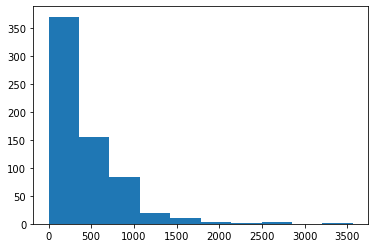

Mean: 143.32647426675584
Standard deviation: 269.5386190114951
Minimum: 0.0
Maximum: 1768.5227493319999


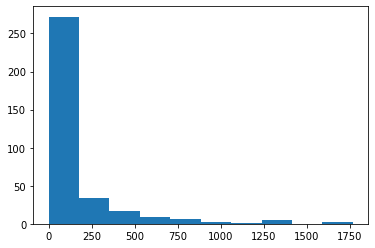

Mean: 2.052550231839258
Standard deviation: 3.1422270555779344
Minimum: 0
Maximum: 36


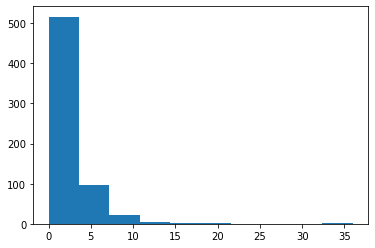

Mean: 0.8620689655172413
Standard deviation: 2.5491599418312028
Minimum: 0
Maximum: 27


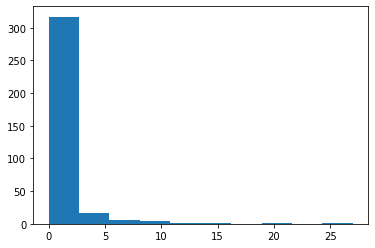

Mean: 3.384853168469861
Standard deviation: 2.2588214709184595
Minimum: 0
Maximum: 7


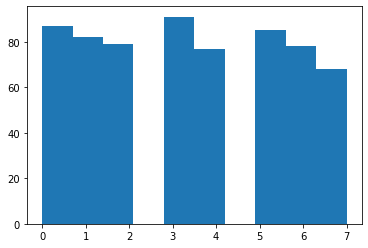

Mean: 1.9051724137931034
Standard deviation: 1.9057314413619046
Minimum: 0
Maximum: 7


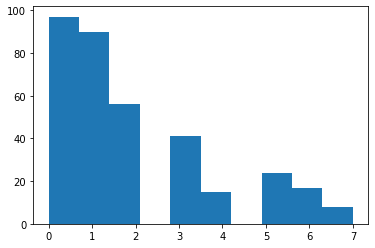

In [78]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.
display_summary_stats(total_minutes_spent_by_passing_engagements)
display_summary_stats(total_minutes_spent_by_non_passing_engagements)
display_summary_stats(total_lessons_completed_by_passing_engagements)
display_summary_stats(total_lessons_completed_by_non_passing_engagements)
display_summary_stats(total_days_visited_by_passing_engagements)
display_summary_stats(total_days_visited_by_non_passing_engagements)


## Improving Plots and Sharing Findings

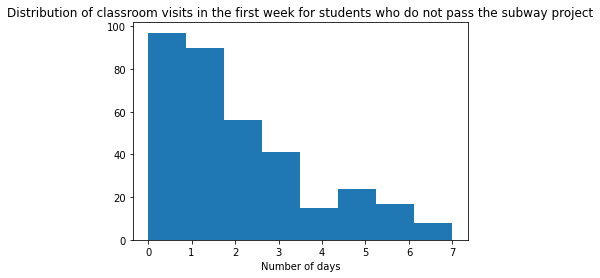

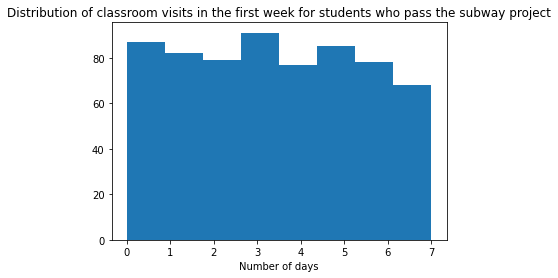

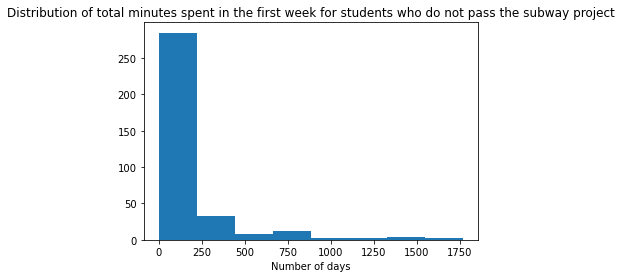

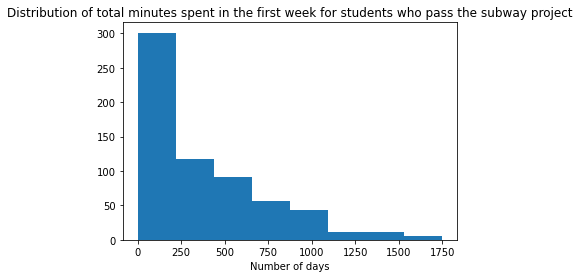

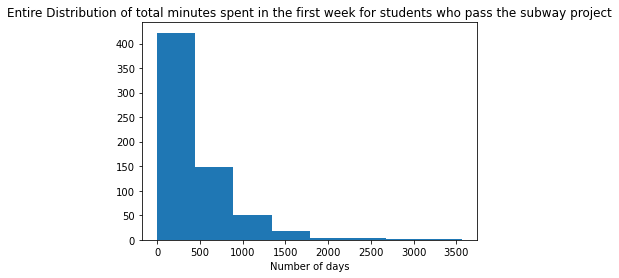

In [45]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.

import seaborn as sns

plt.hist(total_days_visited_by_non_passing_engagements_by_account.values(), bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who do not pass the subway project')
plt.show()


plt.hist(total_days_visited_by_passing_engagements_by_account.values(), bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who pass the subway project')
plt.show()


plt.hist(total_minutes_spent_by_non_passing_engagements_by_account.values(), bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of total minutes spent in the first week ' + 
          'for students who do not pass the subway project')
plt.show()


plt.hist(total_minutes_spent_by_passing_engagements_by_account.values(), bins = 8, range = (0,1750))
plt.xlabel('Number of days')
plt.title('Distribution of total minutes spent in the first week ' + 
          'for students who pass the subway project')
plt.show()

plt.hist(total_minutes_spent_by_passing_engagements_by_account.values(), bins = 8)
plt.xlabel('Number of days')
plt.title('Entire Distribution of total minutes spent in the first week ' + 
          'for students who pass the subway project')
plt.show()